In [1]:
import pandas as pd
from tqdm.notebook import tqdm_notebook
from dateutil import parser
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np
import joblib

import warnings
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from textblob import TextBlob
import emoji
import itertools 
import matplotlib.style as style
style.use('ggplot')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\TEMP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read txt file
f = open("groupchat_backup.txt","r", encoding="utf8")
content = f.read()
print(content)

[LINE] Chat history in Ini girl band legit
Saved on: 28/04/2022 13.56

Fri, 18/12/2020
17:20	Trisha D.H	"Hi guyss! I’m starting a podcast with a friend of mine that’s all about fandom culture; Herpot, Marvel, DC, Star Wars, Anime, DOCTOR WHO, everythingg!

Bisa banget difollow our ig: https://instagram.com/fan_onthephone?igshid=1szefuyrfnsq2 

Listen to it here: https://open.spotify.com/show/5ZwDnYA7FuFykZx3lUyUZy?si=T-gwdbsKTeKywaOfLZDXgg"
17:20	Trisha D.H	[Photo]
17:21	Rinta 린타 リンタ	YAY! finally times has come 
17:21	Rinta 린타 リンタ	[Sticker]
17:21	Trisha D.H	[Sticker]
17:27	Trisha D.H	Nonton juga di youtube guyss: https://youtu.be/CLyUTp9bAJY

Sat, 19/12/2020
10:51	Nathania Vanessa	[Photo]
10:51	Nathania Vanessa	[Video]
10:53	Nathania Vanessa	haii genggg, komunitas pemuda di gerejaku lg adain christmas celebration, judulnya there is no hope, premiere nya hari ini jam 5 sore di youtube channel Home for Generation. yg mau bergabung, more than welcome utk tune in n ibadah bareng🤗

Sun, 20/

# Data Preprocessing

In [4]:
# Split content per line
lines = []
count = 0
line = ""
for letter in content:#
    if letter == '\n':
        lines.append(line)
        line = ""
    else:
        line = line + letter

In [5]:
# Function to detect if a string is a date
from dateutil.parser import parse

def isDateUniversal(string, fuzzy=False):
    """
    Return whether the string can be interpreted as a date.

    :param string: str, string to check for date
    :param fuzzy: bool, ignore unknown tokens in string if True
    """
    try: 
        parse(string, fuzzy=fuzzy)
        return True

    except ValueError:
        return False

In [30]:
# Function to detect if a string is a date with format 
from datetime import datetime

def isDate(date_text):
    try:
        if date_text != datetime.strptime(date_text, "%d/%m/%Y").strftime("%d/%m/%Y"):
            raise ValueError
        return True
    except ValueError:
        return False

In [31]:
print(isDate('23/12/2021'))

True


In [32]:
from datetime import datetime

def isTime(time_text):
    try:
        if time_text != datetime.strptime(time_text, "%H:%M").strftime("%H:%M"):
            raise ValueError
        return True
    except ValueError:
        return False

In [8]:
def dateConvertStr(text):
    if len(text) == 8:
        text = text[:0] + '0' + text[0:]
        text = text[:3] + '0' + text[3:]
    elif len(text) == 9:
        if text[1] == '/':
            text = '0' + text[0:]
        else:
            text = text[:3] + '0' + text[3:]
    return text

In [33]:
# Initialize Dataframe
dict = {
    'date':[],
    'time':[],
    'name':[],
    'chat':''
}

df = pd.DataFrame(dict)

start_time = datetime.now()

# Preprocessing Test
time = ""
name = ""
chat = ""
date = ""

for line in lines:
    # Split per line
    words = []
    words = line.split('\t')
    print(words)
    if(words == ['']):
        continue
    elif (len(words) == 1):
        # Check if the line is a date universally
        if not(isDateUniversal(words[0])):
            # Add new line to chat
            chat = chat + " \n" +words[0]
            # Remove last row
            df = df[:-1]
            # Add updated row to dataframe
            df.loc[len(df.index)] = [date, time, name, chat]
        elif isDateUniversal (words[0]):
            # Converting
            word = words[0]
            # Cut day name
            date_potong_str = word[5:-1] + word[-1]
            # Convert to dd/mm/yyyy format
            date_try = dateConvertStr(date_potong_str)
            # Check the date format
            if isDate(date_try):
                date = date_try
    elif (len(words) == 2):
        name = ""
        time, chat = words[0], words[1]
        # Add row to dataframe
        df.loc[len(df.index)] = [date, time, name, chat]
    elif (len(words) == 3):
        time, name, chat = words[0], words[1], words[2]
        # Add row to dataframe
        df.loc[len(df.index)] = [date, time, name, chat]

# Keep track how long code run
print("Finished at " + str(datetime.now() - start_time))

['Fri, 18/12/2020']
18/12/2020
['17:20', 'Trisha D.H', '"Hi guyss! I’m starting a podcast with a friend of mine that’s all about fandom culture; Herpot, Marvel, DC, Star Wars, Anime, DOCTOR WHO, everythingg!']
['']
['Bisa banget difollow our ig: https://instagram.com/fan_onthephone?igshid=1szefuyrfnsq2 ']
['']
['Listen to it here: https://open.spotify.com/show/5ZwDnYA7FuFykZx3lUyUZy?si=T-gwdbsKTeKywaOfLZDXgg"']
['17:20', 'Trisha D.H', '[Photo]']
['17:21', 'Rinta 린타 リンタ', 'YAY! finally times has come ']
['17:21', 'Rinta 린타 リンタ', '[Sticker]']
['17:21', 'Trisha D.H', '[Sticker]']
['17:27', 'Trisha D.H', 'Nonton juga di youtube guyss: https://youtu.be/CLyUTp9bAJY']
['']
['Sat, 19/12/2020']
19/12/2020
['10:51', 'Sasha', '[Photo]']
['10:51', 'Sasha', '[Video]']
['10:53', 'Sasha', 'haii genggg, komunitas pemuda di gerejaku lg adain christmas celebration, judulnya there is no hope, premiere nya hari ini jam 5 sore di youtube channel Home for Generation. yg mau bergabung, more than welcome utk 

['14:49', 'Phoebe Fiorentina', 'udah dreee udah mendingannn']
['14:49', 'Phoebe Fiorentina', 'paling control lagi ke rs sama atur jadwal buat kemonya lagii']
['14:50', 'Trisha D.H', 'Ohh syukurlahh']
['14:50', 'Trisha D.H', 'Mudah2an bokap lu cepat sembuhh  fibb 🙏🏻🙏🏻 Our love, support and prayers go to youu and your fam ❤️']
['14:51', 'Phoebe Fiorentina', 'aminnnnn makasi trishhhhh🥺🥺(Cony attracted)']
['14:51', 'Phoebe Fiorentina', '[Sticker]']
['16:39', 'Sasha', 'wah syukurlahhhh ikut seneng euy dengernya🤗']
['16:39', 'Sasha', 'semangat terus yaa fiiib']
['16:39', 'Sasha', '🤗❤️']
['16:40', 'Rinta 린타 リンタ', 'Aduh baguslah ❤️ semangat trus fibi']
['16:58', 'Andrea', '[Sticker]']
['17:30', 'Phoebe Fiorentina', 'waaa makasiiii(moon pleading)(moon pleading) @Rinta 린타 リンタ @andrea pangestu @Nathania Vanessa ']
['']
['Thu, 24/12/2020']
24/12/2020
['06:08', 'Rinta 린타 リンタ', '[GAGs] Just pain...']
['08:03', 'Sasha', 'KASIAN:((((😂😂😂']
['08:03', 'Sasha', 'itu dari game tah?😂']
['08:03', 'Rinta 린타 リ

['18:04', 'Trisha D.H', 'Bolehh']
['18:04', 'Trisha D.H', 'Kirimin dong rinn']
['18:06', 'Rinta 린타 リンタ', '[Photo]']
['18:06', 'Trisha D.H', 'Thankyouu']
['18:06', 'Rinta 린타 リンタ', 'No problem ^^']
['20:35', 'Andrea', 'Sbb gua merasa foto2 kita bobrok semua wkwkwkkwkw']
['20:36', 'Andrea', 'Tapi yg bener2 kita lengkap semua dikit we']
['20:38', 'Rinta 린타 リンタ', 'Iya weh']
['20:39', 'Rinta 린타 リンタ', 'Plz corona slsi thn dpn']
['20:39', 'Rinta 린타 リンタ', 'Hrs ketemuan fix']
['']
['Fri, 01/01/2021']
01/01/2021
['00:08', 'kezia natalia', 'Met taun baru gaisss ❤']
['00:09', 'Rinta 린타 リンタ', '[Sticker]']
['00:09', 'Rinta 린타 リンタ', '[Sticker]']
['00:11', 'Phoebe Fiorentina', 'happy new yearrrrr']
['00:11', 'Phoebe Fiorentina', '[Sticker]']
['00:21', 'Sasha', 'happy new year fammmm🤗']
['00:34', 'Trisha D.H', '[Sticker]']
['00:34', 'Trisha D.H', ' HAPPY NEW YEAR GUYSSS!!!']
['00:35', 'Holly', 'HEPI NIU YER MAI BEBEB”QU 🥰']
['20:30', 'Trisha D.H', 'Hi guys! Buat yang belom sempat nonton Wonder Woman 198

['17:59', 'Holly', 'lagi butuhnya remajaa yg smp/sma gituu']
['17:59', 'Rinta 린타 リンタ', 'Buat survei y?']
['18:01', 'Holly', 'buat wawancara sih ini']
['18:18', 'Sasha', '@Trisha D.H mgkn?']
['18:18', 'Sasha', 'atau temen2nyaaa']
['18:33', 'Phoebe Fiorentina', 'sorry holll adek gua gasuka makeup :"D']
['18:33', 'Trisha D.H', 'Ade gw gapake makeup samsekk :”” wkwkw']
['18:33', 'Trisha D.H', 'Btww']
['18:33', 'Trisha D.H', 'Hi guys! In the third episode of Fandom On The Phone we talk about Shipping, boleh bangett tune in and give it a listen😁😁: https://open.spotify.com/episode/4f7MYUYOGdDV5YR6oc1Ysb?si=3RUS-gvQTMaBUJjF7hqpcg']
['18:33', 'Trisha D.H', '[Photo]']
['18:33', 'Phoebe Fiorentina', '[Sticker]']
['18:33', 'Trisha D.H', 'Bolehh bgt didengerinn']
['18:33', 'Phoebe Fiorentina', 'lucu bangettttt']
['18:34', 'Trisha D.H', 'Thankiess temen gw yg bikin']
['18:43', 'Rinta 린타 リンタ', 'Ku coba tanya sepupu']
['']
['Sat, 23/01/2021']
23/01/2021
['20:38', 'Holly', 'bolehhbole']
['']
['Wed, 27/

['09:50', 'Sasha', '🍻🍻🍻']
['13:29', 'Neysa', 'hey u thanks for pijja u_u']
['13:29', 'Neysa', 'i like pijja']
['13:32', 'Andrea', '[Sticker]']
['13:32', 'Andrea', 'jgn  lupa unboxing hadiah ulang ya']
['13:32', 'Andrea', 'kek vlogger2 gitchu']
['13:40', 'Neysa', 'WKWKKWKW']
['14:03', 'Rinta 린타 リンタ', 'Uhuy']
['15:59', 'Sasha', 'terngakak ini']
['15:59', 'Sasha', 'uyee~']
['']
['Sat, 06/02/2021']
06/02/2021
['17:21', 'kezia natalia', 'MAKASI BGT GESSSS 😭❤']
['17:21', 'kezia natalia', 'LOP U PULLLL']
['17:21', 'kezia natalia', '[Sticker]']
['17:23', 'Phoebe Fiorentina', '[Sticker]']
['17:23', 'Neysa', '[Sticker]']
['17:24', 'Neysa', 'muuf ye telat ;o; but enjoy kezkezz']
['17:34', 'kezia natalia', '[Sticker]']
['17:41', 'Sasha', 'YEAAY love kezkez💛🤗']
['18:48', 'Trisha D.H', 'Urwelcomee kezz 💕💕']
['18:48', 'Trisha D.H', 'Sbb wkwk']
['18:48', 'Trisha D.H', 'Guys']
['18:48', 'Trisha D.H', '[Photo]']
['18:48', 'Trisha D.H', 'My height’s not the only thing short about me anymore hahaha']
['19

['19:10', 'Trisha D.H', 'Kyk maleman jam 9 or 10 gt?']
['19:10', 'Trisha D.H', 'I’m up for hire wkwkw']
['19:59', 'Holly', 'Luv u all gengs, happy vals day!']
['20:00', 'Rinta 린타 リンタ', 'I\'m dating w/ translation rn :" sorry']
['20:00', 'Rinta 린타 リンタ', 'Btw girls, i have something foe u']
['20:00', 'Rinta 린타 リンタ', '*for']
['20:06', 'Neysa', 'selamat hari kasih sayang bbygorls, sorry telat ucapinnya ;o;']
['20:06', 'Neysa', 'saya lagi bergulat dengan kuliah']
['21:22', 'Trisha D.H', 'Isokee guys']
['21:22', 'Trisha D.H', 'Have fun with your Vday dates (baik itu manusia maupun tugas)']
['21:22', 'Rinta 린타 リンタ', 'Thankyou']
['']
['Fri, 19/02/2021']
19/02/2021
['15:46', 'Trisha D.H', 'Guyss']
['15:47', 'Trisha D.H', 'Ayoo dengerin the new episode of Fandom on the Phone where Ney talks about K-Pop Idols and fandom psychology!']
['15:47', 'Trisha D.H', 'https://open.spotify.com/episode/31JFRkjltmMPmXG5DtvrzX?si=gHsvs2bVRe2LYog3XX1UCg']
['15:47', 'Trisha D.H', '[Sticker]']
['15:50', 'Rinta 린타

['05:47', 'Andrea', 'Wkwkwkwkwk']
['05:47', 'Andrea', 'Gua akhirnya ketiduran guais']
['11:58', 'Trisha D.H', 'Guyss gw baru rilis interview with an Indonesian Webtoon Artist! If sempet boleh nonton or just drop a like hehe: https://www.youtube.com/watch?v=UltMfdCoHgY']
['12:53', 'Phoebe Fiorentina', '[Sticker]']
['13:41', 'Andrea', '[Sticker]']
['13:46', 'Rinta 린타 リンタ', '[Sticker]']
['']
['Sat, 06/03/2021']
06/03/2021
['18:12', 'Phoebe Fiorentina', 'guysss']
['18:12', 'Phoebe Fiorentina', 'mau nanya dikit, jadi gua ada tugas city branding. nah disuru ngebahas salah satu daerah yang ada di Indonesia. menurut kalian, kalau ngebahas wakatobi terlalu mainstream ga yaa?']
['18:14', 'Phoebe Fiorentina', 'atau kalian ada recommend daerah lain yang mungkin punya destinasi/hal" unik kah?']
['19:01', 'Rinta 린타 リンタ', 'Hmmm menurutku wakatobi bs kok d bahas']
['19:02', 'Rinta 린타 リンタ', 'G terlalu byk yg tau setauku']
['19:15', 'Phoebe Fiorentina', 'aaahhh okaaayyy :D']
['19:15', 'Phoebe Fiorentina

['15:55', 'Neysa', 'just a reminder']
['16:00', 'Rinta 린타 リンタ', 'Wiiihhh 👏👏👏👏']
['16:55', 'Sasha', 'uuuu~!']
['16:56', 'Sasha', '[Photo]']
['16:56', 'Sasha', '@andrea pangestu bapp']
['20:33', 'Andrea', '[Sticker]']
['21:36', 'Rinta 린타 リンタ', 'Hey guys']
['21:36', 'Rinta 린타 リンタ', 'Sorry random malam2 bru ngetext']
['21:36', 'Rinta 린타 リンタ', 'I actually need ur guys opinion']
['21:36', 'Trisha D.H', 'Sup rin?']
['21:37', 'Rinta 린타 リンタ', 'Jd d internship, ku bagian analisis app gt. Jd rencanany mw bikin app language khususny jepang, jd pemula bs bljr d situ.']
['21:38', 'Rinta 린타 リンタ', 'So if u guys ever use language app, plz tell me yg kalian butuh u/ pelajarin itu apa aja, kyk fitur2ny. Trus complain selama pake app belajar gt apa aja']
['21:39', 'Trisha D.H', 'Gw sempet pake duolingo rin']
['21:39', 'Trisha D.H', 'Tp gaterlalu lama']
['21:39', 'Rinta 린타 リンタ', 'Ah its ok, what do u feel when u using it']
['21:41', 'Trisha D.H', 'Hmm gmn ya']
['21:41', 'Trisha D.H', 'Bosen sih']
['21:41',

['14:29', 'Trisha D.H', 'Thankiess fib & dree!']
['14:30', 'Phoebe Fiorentina', 'jam 7.30 sih gua, tapi kalo mau dari jam kelas kedua juga itsokay siii']
['14:30', 'Phoebe Fiorentina', 'holly kepagian gaaa?']
['14:30', 'Andrea', 'Holi justrsu kls jam 7 keknya']
['14:30', 'Andrea', 'Wkwkwkwkwk']
['14:35', 'Holly', 'Tanya dulu ye gw HAHAH']
['14:35', 'Holly', 'Pengennya dari jam 7 skalian si gw ']
['14:35', 'Holly', 'Kalo ditengah lebi repor']
['14:35', 'Holly', 'T']
['14:35', 'Andrea', 'Nah iya ditengah2 ntar gojek bawa2 laptop']
['14:35', 'Andrea', 'HAHAHAHAH']
['14:35', 'Holly', 'Gakla HAHAH']
['14:36', 'Andrea', 'gua paling bisanya dtg jam stgh 8 atoga stgh 10 sialnya sekalian bokap gua nganter emak']
['14:36', 'Holly', 'Pake hp ae biar kek selfie” uhuy']
['14:36', 'Andrea', 'Najis wkwkwkwk']
['14:36', 'Andrea', 'Paling holi ditemenin fibi dulu kalo mau (?)']
['14:37', 'Holly', 'Temenin dr jam 7 dong :( biasanya nyokap gamau kalo gada yg nemenin']
['14:39', 'Phoebe Fiorentina', 'WKWK

['3:08 PM']
PM
['https://www.youtube.com/watch?v=JFRM734sC5E&t=2s"']
['15:46', 'Andrea', 'nitip geng']
['16:13', 'Holly', '[Photo]']
['16:13', 'Holly', '[Photo]']
['16:14', '', 'Trisha D.H unsent a message.']
['16:18', 'Holly', '[Photo]']
['16:18', 'Holly', '[Photo]']
['16:18', 'Holly', '[Photo]']
['16:19', 'Holly', '[Photo]']
['16:19', 'Holly', '[Photo]']
['16:19', 'Holly', '[Photo]']
['16:20', 'Holly', '[Photo]']
['16:20', 'Andrea', 'Fibb jangan lupa balekk, udh mendungg @Phoebe Fiorentina ']
['16:20', 'Trisha D.H', 'Woww ini apaan? Film horror?']
['16:21', 'Andrea', 'Dari neysa @Neysa ']
['16:21', 'Andrea', 'Bagus we']
['16:21', 'Andrea', 'Nonton de trish']
['16:21', 'Andrea', 'Thriller horror (?)']
['16:21', 'Phoebe Fiorentina', 'siaaaaapppp']
['16:21', 'Neysa', 'iyaa hehe']
['16:21', 'Phoebe Fiorentina', 'abis kelas dre WKWKWKKW']
['16:21', 'Neysa', 'stan Alter']
['16:21', 'Neysa', 'Alter best horror shorts on ytube']
['16:22', 'Neysa', 'hati2 otw fibiii :D semoga pptnya nilainya 

['21:04', 'Rinta 린타 リンタ', 'Sama2 fibi uwu']
['21:10', 'Andrea', 'ih manjiww']
['21:10', 'Andrea', 'sedep2 manis yaa']
['21:14', 'Andrea', 'selamat dimaem ya fiboyy']
['21:14', 'Andrea', 'selamat berbuka sama yg manis2']
['21:14', 'Andrea', 'eh telat']
['21:14', 'Andrea', 'wgwgwgwg']
['21:20', 'Sasha', 'FIBI HEPI BETDEI SEMOGA MAKIN MAKIN DAN MAKIN YA @Phoebe Fiorentina ']
['21:20', 'Holly', 'uhuyyy habede habedeeee fibb!!!!!! semoga disana kamu bisa merasakan kemanisan kita semua uwu ']
['21:20', 'Holly', '@Phoebe Fiorentina ']
['21:21', 'Rinta 린타 リンタ', 'HBD BEBEB']
['21:21', 'Rinta 린타 リンタ', '@Phoebe Fiorentina ']
['21:21', 'Rinta 린타 リンタ', 'GUYS MAIN AMONG US KUY //PLAK']
['21:21', 'Andrea', 'lu pait sih']
['21:21', 'Phoebe Fiorentina', 'MAKASI WOIII😭😭😭😭🥺🥺🥺']
['21:21', 'Phoebe Fiorentina', 'PENYEMANGAT TUGAS BANGET XD']
['21:21', 'Phoebe Fiorentina', '[Sticker]']
['21:22', 'Sasha', 'fibbage aja yu']
['21:22', 'Sasha', 'merayakan ultah fibi #plak']
['21:24', 'Andrea', 'ape itu saia ga p

['16:20', 'Andrea', 'DIMANE']
['16:21', 'Andrea', 'WKWKWKKWKW']
['16:21', 'Rinta 린타 リンタ', 'WKWKWKWK']
['16:21', 'Rinta 린타 リンタ', 'Blkgny arah giant']
['16:25', 'Holly', 'andrea lost in bintaro']
['16:25', 'Holly', 'padahal lu tinggal di bintaro rinta tinggal di bsd']
['16:26', 'Rinta 린타 リンタ', '[Sticker]']
['16:35', 'Andrea', 'Adu wkwkwkwk']
['16:35', 'Andrea', 'Bukannya']
['16:35', 'Andrea', 'Transmart ya itu']
['16:40', 'Holly', 'transmart ada dibawahnya ga si']
['16:40', '', 'Rinta 린타 リンタ unsent a message.']
['16:40', 'Rinta 린타 リンタ', 'Iya ada']
['17:08', 'Andrea', 'Emg itu namanya transpark ya HAHAHAHAHA']
['17:08', 'Andrea', 'gua ingernya transmart']
['17:09', 'Rinta 린타 リンタ', 'JIAHAHAHA']
['17:46', 'Phoebe Fiorentina', 'transpark itu yang dulu kita kesana bukan sii :"D']
['17:46', 'Phoebe Fiorentina', 'yang pas baru" bukaa']
['17:46', 'Phoebe Fiorentina', 'belum kopidddd']
['17:48', 'Rinta 린타 リンタ', 'Iyaaa itu :"D']
['']
['Thu, 06/05/2021']
06/05/2021
['08:08', 'Phoebe Fiorentina', 'p

['18:55', 'Sasha', 'kayak bikin music video gimanaa gituu']
['18:55', 'Sasha', 'jadi storyboardnya lebih ke ngikutin musicnya, siapa yg lagi jadi melody, n ngecapture momen2 penting di musiknya']
['19:01', 'Andrea', 'Adaa sii']
['19:03', 'Andrea', 'butuh brp org sang? Ada si ni kenalan']
['19:16', 'Sasha', 'satu orang aja sbnrnyaa']
['19:17', 'Sasha', 'btw ini bakal ngakak sih pertanyaannya, tp orangnya punya kamera kah?;-; soalnya kami ga punyaak']
['19:24', 'Rinta 린타 リンタ', 'Hrsny yg bener2 into videography hrsny ada kamera kok']
['19:26', 'Phoebe Fiorentina', 'temen gua kamera+stabilizer+dll peralatan videographynya lengkap siii tapi takutnya dia suka ada project juga, maybe temen gua bisa jadi cadangan aja 😂😂']
['19:32', 'Trisha D.H', 'Guyss jd zoom ga malem inii?']
['19:32', 'Rinta 린타 リンタ', 'Pd bs tak?']
['19:32', 'Trisha D.H', 'Gw sabi2 ajaa, we can use my zoom link kalo mauu']
['19:34', 'Phoebe Fiorentina', 'ku bisa guysss']
['19:35', 'Phoebe Fiorentina', 'tapi jangan kemaleman s

['00:13', 'Neysa', 'hah lah']
['00:13', 'Neysa', 'nah loh hah']
['00:14', 'Neysa', '[Sticker]']
['00:14', 'Neysa', 'yaudah max 2 akun aja']
['00:14', 'Neysa', 'jangan 3 buset']
['00:14', 'Neysa', 'WKWKWKKWKW']
['00:14', 'Holly', 'yg satu itu emg ga kepake si hehe']
['00:14', 'Neysa', 'YAUDAH GAWSA MBAK']
['00:23', 'Phoebe Fiorentina', 'KWKWKWKWKWKWKWKWK']
['05:58', 'Andrea', 'HAHAHAHA ANJG NEYSA NGAKAK BGT']
['05:58', 'Andrea', 'LU LINENYA BNYK BGT SI HOLLL']
['05:58', 'Andrea', 'mau ngechat lu aje bingung yg mane']
['05:58', 'Andrea', '[Sticker]']
['05:59', 'Andrea', 'Ada yg mau traktiran hari ini btw @Nathania Vanessa ']
['06:00', 'Andrea', 'Siap2 pergi ya gais hari ini, sasa mau traktiran katanya (Ups)']
['07:07', 'Phoebe Fiorentina', '[Sticker]']
['07:29', 'Rinta 린타 リンタ', 'WKWKWKWK PAGI2']
['07:30', 'Rinta 린타 リンタ', '[Sticker]']
['11:28', 'Trisha D.H', 'Guyss ini super random tp, disini ada yg msh nyimpen monolog sma ga?']
['11:30', 'Andrea', 'yg manatu']
['11:31', 'Trisha D.H', 'I 

['01:17', 'Trisha D.H', 'I’ve been watching skincare videos for 3 hours straight wkwkw']
['01:18', 'Trisha D.H', 'YES']
['01:18', 'Neysa', "ur skins pH is like 3,5. alcohol's like 8 and above"]
['01:18', 'Trisha D.H', 'And the ones I found were either imported or expensive so yeah']
['01:18', 'Neysa', "it's gonna weaken ur skin barrier"]
['01:18', 'Trisha D.H', '*nods in regret']
['01:18', 'Trisha D.H', 'I’ll stick with pimple cream from now on']
['01:20', 'Neysa', "here's the easiest routine: cleanser, toner, serum (can be from serums or face masks), moisturizer"]
['01:20', 'Neysa', 'start with those 4 products']
['01:21', 'Trisha D.H', 'Got it, thanks ney']
['01:23', 'Trisha D.H', 'Day and night or just night time is enough?']
['01:24', 'Neysa', '"ik ur skin is dry af so here\'s some tips from me:']
['']
["1. lessen the use of ur AC, it's gonna dry ur face,"]
['2. the cheapest and friendliest moisturizer is aloe vera, so go head and start with that. i also heard snail goo is good.']


['13:38', 'Sasha', 'congrats gurrrrrl!']
['13:38', 'Holly', 'Yauda gapapa tar kita streaming rame” HOHOHO']
['13:38', 'Sasha', 'OMG']
['13:38', 'Sasha', 'WIIHIHI']
['13:38', 'Rinta 린타 リンタ', 'Yah...']
['13:38', 'Trisha D.H', 'AWWW 🥺❤️❤️']
['13:38', 'Rinta 린타 リンタ', 'YOOOIIII']
['13:38', 'Sasha', '(2)']
['13:38', 'Trisha D.H', 'Thankiess neighbor!!']
['13:39', 'Trisha D.H', '❤️❤️']
['13:39', 'Rinta 린타 リンタ', 'Aku kabarin si bunny y //plak']
['13:39', 'Rinta 린타 リンタ', '[Sticker]']
['13:43', 'Trisha D.H', 'Hahaha sinii gw aja yg ngechat, line id dia apa wkwkw']
['13:47', 'Rinta 린타 リンタ', 'Wkwkwk oki, pc yo']
['13:48', 'Trisha D.H', '[Sticker]']
['14:10', 'Phoebe Fiorentina', 'kapan trishhhhhh']
['14:12', 'Trisha D.H', 'UQ i think Desember, UI May rata2 biasanya']
['14:53', 'Andrea', 'OHMYGODDD UDAH SKRIPSIAN GA BILANG2 !!! TIBA2 LANGSUNG SHARE BEGINIANAAAAA, SELAMAT EUYYY @Trisha D.H ']
['14:54', 'Andrea', 'kita dateng versi online ya? WKWKKWKWK']
['14:55', 'Trisha D.H', 'Gaa skripsi gw dree']

['18:50', 'Trisha D.H', 'Wait gmn rin?']
['18:51', 'Trisha D.H', 'Btw ini maksudnya ttp jam 7 cuma gw schedulenya 6:30 biar ttp bisa buka zoomnya']
['18:51', 'Trisha D.H', 'Jd kalo mau nyusul jg sabii']
['18:51', 'Phoebe Fiorentina', 'ehh kaget gua join masih kosong tadi KWKWKW']
['18:52', 'Phoebe Fiorentina', 'pada join zoom jamber guysss']
['18:52', 'Holly', 'Aaa nyusul”']
['18:52', 'Holly', 'Gw mandi dulsss']
['18:52', 'Rinta 린타 リンタ', 'Oalaaahh']
['18:52', 'Rinta 린타 リンタ', 'Ku msh d jln, lg ngirim pesanan ']
['18:52', 'kezia natalia', 'Gua nyusul jugaaa mo mandi dulsss']
['18:53', 'Trisha D.H', 'okee gpp guys sanss always open kok']
['18:53', 'Trisha D.H', 'BTW']
['18:53', 'Trisha D.H', '[Photo]']
['18:53', 'Trisha D.H', 'WE ARE IN THE PROGRAMM']
['18:53', 'Trisha D.H', 'AWW SASA']
['18:53', 'Trisha D.H', '🥺❤️❤️']
['18:54', 'Phoebe Fiorentina', 'WAAAAAAAAA 🥺🥺🥺🥺🥺🥺🥺🥺']
['18:57', 'Sasha', 'UUUUUUUUUUUUUUUUUUUUUUUU']
['18:58', 'Sasha', 'HAHAHAHAHAHHHAHA YAIYADONG KALIAN SUPPORT SYSTEM TE

['📍 Knowledge regarding Visual Art and Social Media']
['📍 Networking']
['Come and Join us, Register through:']
['bit.ly/RTW1Webinar']
['bit.ly/RTW1Webinar']
['bit.ly/RTW1Webinar']
['-------------']
['For further information, contact us via']
['Instagram: @wander.voice']
['bit.ly/GMG-CS"']
['16:52', 'Phoebe Fiorentina', 'numpang share ya guysss hehehe']
['']
['Mon, 02/08/2021']
02/08/2021
['13:18', 'Andrea', '"siang siang pake palu']
['asik dapet kue bolu  (hands forming heart)"']
['13:18', 'Andrea', 'AAAA KAGET BANGET NJAYY']
['13:18', 'Andrea', 'TERIMAKASIH BANYAKKKK']
['13:18', 'Rinta 린타 リンタ', 'WEHEHEHEHE']
['13:20', 'Andrea', 'all of u made my day']
['13:20', 'Andrea', 'makasih banget ya']
['13:20', 'Andrea', 'ASLI']
['13:20', 'Andrea', 'AAAA']
['13:20', 'Andrea', 'SUKA BOLUU']
['13:20', 'Andrea', 'UWUUU']
['13:20', 'Phoebe Fiorentina', 'UWU']
['13:20', 'Phoebe Fiorentina', 'JANGAN DIABISIN SENDIRI YA']
['13:20', 'Andrea', 'yah ketauan']
['13:21', 'Andrea', 'WKWKKWKWKWK']
['13:22', 

['01:12', 'Trisha D.H', 'But please read this kalo ada waktu bsk']
['01:12', 'Trisha D.H', 'https://www.abc.net.au/indonesian/2021-08-24/lockdown-telah-membuat-kesenjangan-hidup-di-sydney-makin-terasa/100402108']
['01:13', 'Trisha D.H', 'My first ever published article on ABC (sebenernya cuma hasil translate dari Eng to Indo sihh) tapi my name is on there for the first time 😭😭😭']
['01:49', 'Phoebe Fiorentina', '[Sticker]']
['01:49', 'Rinta 린타 リンタ', '[Sticker]']
['01:50', 'Rinta 린타 リンタ', 'Yeeeessss congrats girl!']
['01:54', 'Trisha D.H', '[Sticker]']
['01:55', 'Trisha D.H', 'THANKYOUU FIBS AND RIN!']
['08:57', 'Neysa', '[Sticker]']
['09:05', 'Trisha D.H', '[Sticker]']
['09:09', 'Neysa', 'hey, better be an over-glorified translator on an ABC article than a over-glorified translator on nava articles :))))']
['09:09', 'Trisha D.H', 'Hahaha ur right 😭🙌🏻']
['10:37', 'Sasha', '😍😍😍 congrats neighboooorrr']
['10:37', 'Sasha', '[Sticker]']
['10:38', 'Trisha D.H', 'Thankiess neighboooor 🤗💖💖']
['

['22:42', 'Neysa', 'kalian kalo ada adek yang smp gitu pls diminta soalnya gw butuh range usia yg luas makasi u_u']
['23:30', 'Holly', '[Sticker]']
['']
['Thu, 09/09/2021']
09/09/2021
['09:10', 'Rinta 린타 リンタ', '[Sticker]']
['09:10', 'Rinta 린타 リンタ', 'Btw guys, mw nanya']
['09:10', 'Rinta 린타 リンタ', 'Ada yg ngerti bedany cv sm resume? 😅 gw bingung lht contohny']
['09:17', 'Neysa', 'cv itu list kemampuan & pengalaman kerja lu, resume i think referensi orang lain trhdp lu']
['09:17', 'Neysa', 'to me theres no difference lmao']
['09:20', 'Rinta 린타 リンタ', 'See? (XD)']
['09:20', 'Rinta 린타 リンタ', 'I bingung soalny perusahaan yg aku mw lamar mintanya resume']
['09:20', 'Rinta 린타 リンタ', 'Okioki']
['09:53', 'Neysa', 'sama if u can, ']
['09:53', 'Neysa', 'please bantu share ke story kalian kalo bisa 👉👈']
['09:53', 'Neysa', '[Photo]']
['10:01', 'Phoebe Fiorentina', 'uwu tjakep banget neysss']
['10:01', 'Trisha D.H', 'Okeyy']
['10:01', 'Rinta 린타 リンタ', 'Roger sis']
['10:02', 'Neysa', 'tag me too ya ahhhh 

['14:31', 'Neysa', 'mampus ntar di comment laporanmu beb']
['14:31', 'Neysa', 'ejja ntar bilang "ormas macam apa ini"']
['14:32', 'Rinta 린타 リンタ', 'Aastaga dre :")']
['14:33', 'Andrea', 'Gapapa, biar ntar pra sidang bukan diroasting bab 1, tpi roasting gituan aja wkwkwkwk']
['14:33', 'Holly', 'Bikin cult girl band legit']
['14:33', 'Rinta 린타 リンタ', 'Ga gitu bu :")']
['14:34', 'Holly', 'nanti kita menyembah api']
['14:34', 'Holly', '[Sticker]']
['14:34', 'Sasha', 'NGAKAK KENAPA YANG SATU NAMANYA KAYAK GITU ADUH WKWKKW']
['14:35', 'Rinta 린타 リンタ', 'Waduh, nanti jd avatar dung']
['14:35', 'Sasha', '[Sticker]']
['14:37', 'Holly', 'anjir jadi inget dewan galang gw @Nathania Vanessa ']
['14:38', 'Sasha', 'HAHAHAH']
['14:38', 'Sasha', 'dasA darmA prAAmukA']
['14:38', 'Sasha', 'STU!']
['14:38', 'Sasha', 'trs larinya pake lompat2 dl']
['14:38', 'Andrea', 'Nama grup gaada yg pernah bener bingung gue wkwkwkwkwk']
['14:38', 'Holly', 'HAHAHAHAHAHHAHA']
['14:39', 'Rinta 린타 リンタ', 'SAAAAAAA WKWKWKWK']
['

['14:07', 'Trisha D.H', 'ohh']
['14:07', 'Trisha D.H', 'iya aneh tuh']
['14:07', 'Trisha D.H', 'di artikel gue ada bbrp solusi yang bisa dicobaa']
['14:07', 'Trisha D.H', 'hihihi']
['14:07', 'Rinta 린타 リンタ', 'Ah naisu']
['14:07', 'Rinta 린타 リンタ', 'Thx trish']
['14:07', 'Trisha D.H', 'gw jg sertif kedua jg blm ada pas nulis itu']
['14:07', 'Trisha D.H', 'skrng udah ada']
['14:07', 'Rinta 린타 リンタ', 'Mantappu']
['']
['Sat, 25/09/2021']
25/09/2021
['16:51', 'Sasha', '[Photo]']
['16:51', 'Sasha', 'https://youtu.be/Hl2mFwjZYCM']
['16:52', 'Sasha', 'Hiii guys kalo lagi senggang feel free to join the worship session yaa 🤗 hugssss']
['16:52', 'Sasha', 'Happy weekend gess!']
['']
['Tue, 28/09/2021']
28/09/2021
['15:41', 'Andrea', 'Halo gaiss, andrea butuh kamu']
['15:41', 'Andrea', 'Selamatkan nyawa depresi saya']
['15:41', 'Andrea', 'Mohon sebarkan ']
['15:41', 'Rinta 린타 リンタ', 'Kenapa sayang?']
['15:42', 'Andrea', 'Mau minta tolong isi dan share kuesioner daku']
['15:42', 'Andrea', '"Halo! Perkena

['23:49', 'Holly', 'Wi atiati masuk angin hehe']
['23:49', 'Holly', 'Isokayy trish nitee!']
['23:54', 'Holly', 'Eh tp gw bentaran doang si keknya nvm hehe']
['23:54', 'Holly', 'Uda mo kelar ternyata']
['']
['Mon, 04/10/2021']
04/10/2021
['00:13', 'Phoebe Fiorentina', 'oalaaaa ok dehh :")']
['']
['Tue, 05/10/2021']
05/10/2021
['09:39', 'Phoebe Fiorentina', 'gaes']
['09:39', 'Phoebe Fiorentina', 'pengen jalan pagi']
['09:40', 'Phoebe Fiorentina', 'trus lanjut kelas bareng (kalo ada)']
['22:09', 'Andrea', 'Anjazz']
['22:09', 'Andrea', 'Abis olahraga otak makin sehat kalo ikut kelas']
['22:09', 'Andrea', 'Menarique']
['22:10', 'Andrea', 'Boleh dicuba tapi jan direncanakan wgwgwgwg']
['22:26', 'Andrea', 'Sbb ya fib :")))) kalo mau hayuk, mayan biar sehatt jalan dri mana sampe mana gitu yg jauh WKWKWKWK']
['']
['Wed, 06/10/2021']
06/10/2021
['06:22', 'Phoebe Fiorentina', 'WKWKWKWKWK']
['06:22', 'Phoebe Fiorentina', 'yuk yukkk bintaro aja gapapaa']
['09:35', 'Andrea', 'Boleww, gua biasanya am

['11:13', 'Sasha', '🙃🙃🙃🙃🙃🙃🙃']
['11:13', 'Trisha D.H', 'Ohiyaa I saw sa wkwkw ']
['11:13', 'Trisha D.H', 'Itsoke laa']
['11:14', 'Sasha', 'Ittu kedelete ga di kalian?']
['11:14', 'Sasha', 'Kaynya']
['11:14', 'Sasha', 'Gw pencetnya delete']
['11:14', 'Sasha', 'Bukan unsend']
['11:14', 'Trisha D.H', 'They understand the context']
['11:14', 'Trisha D.H', 'Blmm']
['11:14', 'Sasha', 'AHAHAHA']
['11:14', 'Trisha D.H', 'Still here for me']
['11:14', 'Sasha', "Maaf ya guyss :')"]
['11:14', 'Sasha', 'Asli hrsnya kriim ke kalian']
['11:14', 'Sasha', 'Malu to the max']
['11:14', 'Sasha', '[Sticker]']
['11:14', 'Sasha', '[Sticker]']
['11:14', 'Phoebe Fiorentina', 'AHAHAHAHHA']
['11:14', 'Trisha D.H', 'At least lu ga ngirim ke grup UPH']
['11:14', 'Phoebe Fiorentina', 'ga kedelete shaaa xD']
['11:14', 'Sasha', 'He euh']
['11:14', 'Sasha', '🙈🤣🤣🤣🤣']
['11:14', 'Sasha', 'Adoohhhhhh']
['11:15', 'Phoebe Fiorentina', '[Video]']
['11:15', 'Sasha', 'Trs udh gabisa didelete lagi sial']
['11:15', 'Phoebe Fiore

['18:34', 'Neysa', '[Sticker]']
['18:34', 'Neysa', 'gais pls']
['18:35', 'Rinta 린타 リンタ', 'Hmmm boleh']
['18:37', 'Trisha D.H', 'Sorrryy2 I cant look at screens for too long :( trying to reduce my screentime biar engga kena attacks lagii']
['18:38', 'Trisha D.H', 'I think ini reasonable, jadi 75k 1/2nya kurleb']
['18:51', 'Neysa', '[Notes] [SECRET SANTA]']
['']
['draw names here:']
['https://mywishlist.online/secretsanta/rzwxyy']
['']
['rules:']
['1. min 75k, ma']
['18:56', 'Neysa', '[Notes] [SECRET SANTA]']
['']
['(opsional) kalo kalian punya preferensi hadiah yang kalian mau (misal mau buku, skin']
['19:13', 'Andrea', 'Sbbb boiii']
['19:13', 'Andrea', 'Anjayy']
['19:14', 'Andrea', 'Bolehh aku s7']
['19:14', 'Andrea', 'Paling gaboleh makanan minuman gimana?']
['19:14', 'Andrea', 'Murni barang']
['19:15', 'Andrea', 'Itu linknya masukin email ney (?)']
['19:16', 'Holly', 'stujuu']
['19:20', 'Neysa', 'Yess, ntar dikasi email nama yg harus lu kirimin']
['19:20', 'Neysa', 'Okee wait gw tamb

['15:12', 'Rinta 린타 リンタ', 'Msh mikir apa ku hrs bw laptop buat magang :")']
['15:13', 'Phoebe Fiorentina', 'ke puncak kita :")']
['15:13', 'Rinta 린타 リンタ', 'Tmptny bgs woi :"))']
['15:32', 'Trisha D.H', '"Hi guys, maaf kemarin link youtubenya salah, seharusnya yang ini: https://youtu.be/hb1WF9uALMI']
['']
['Views, likes and comments akan greatly appreciated untuk membantu kami dalam lomba animasi!']
['']
['Thank you 😄"']
['15:36', 'Rinta 린타 リンタ', 'Okidoki']
['15:52', 'Holly', 'gas keunnn']
['15:53', 'Holly', 'desember akhir gw seminar gaiss doakan :"']
['15:54', 'Phoebe Fiorentina', 'uuuuuu semangat hollyy']
['17:19', 'Rinta 린타 リンタ', 'Semangat!!']
['21:18', 'Andrea', 'Ih lucu gua kasi reaction loh ']
['21:18', 'Andrea', 'Aminnn ']
['21:18', 'Andrea', 'Ih ingin 🥲']
['21:19', 'Andrea', 'Corona kambing']
['21:20', 'Holly', 'pngn di hotel kapsul da :<']
['21:20', 'Holly', 'ada yg perna coba ga gais']
['21:20', 'Holly', 'bobox gitu']
['21:20', 'Holly', 'bobobox']
['21:20', 'Holly', '*']
['21

['08:47', 'Trisha D.H', 'Thankyouu 😭😭']
['08:51', 'Phoebe Fiorentina', 'WHOAAAAA SEMANGAT TRISHHHH']
['09:12', 'Holly', 'mangat trish!!']
['09:12', 'Holly', '[Sticker]']
['09:39', 'Trisha D.H', 'Hihii thankiess hols and fibb 💖💖']
['20:03', 'Andrea', 'ANZAYYY MAAP BARU BUKA LINEE']
['20:03', 'Andrea', 'CICEICEE']
['20:03', 'Andrea', 'Manenii poto2nya']
['20:03', 'Andrea', 'Selamat yaa mendapat satu gelarr 🥳🥳🥳']
['20:37', 'Trisha D.H', '[Photo]']
['20:37', 'Trisha D.H', '[Photo]']
['20:37', 'Trisha D.H', 'Ituu']
['20:38', 'Andrea', 'Anzayy cantik amaty']
['20:47', 'Trisha D.H', 'Hihii thankyouu']
['']
['Tue, 14/12/2021']
14/12/2021
['14:14', 'Neysa', 'hello, mau tanya, ada yg mau confirm hadiah udah sampe? ']
['14:14', 'Neysa', 'just making sure']
['17:50', 'Andrea', 'Belumm']
['18:41', 'Rinta 린타 リンタ', 'Belum']
['']
['Wed, 15/12/2021']
15/12/2021
['09:10', 'Rinta 린타 リンタ', 'Hi guys, izin share yo']
['09:11', 'Rinta 린타 リンタ', '[Photo]']
['09:11', 'Rinta 린타 リンタ', '"DAILY BIBLE READING']
['Da

['18:55', 'Trisha D.H', 'You guys are All I Want For Christmas ehehe ☺️💖']
['18:55', 'Holly', 'Sanss hihihi @Phoebe Fiorentina ']
['18:55', 'Holly', 'Spesial berarti dari qmu']
['19:33', 'kezia natalia', 'met natal gaissss <3']
['19:33', 'kezia natalia', '[Sticker]']
['']
['Sat, 25/12/2021']
25/12/2021
['08:07', 'Andrea', 'SELAMAT NATALL GUAISSSS OMEGOD']
['08:08', 'Phoebe Fiorentina', '[Sticker]']
['08:08', 'Phoebe Fiorentina', '[Sticker]']
['08:10', 'Andrea', 'HAHAHAH NGAKAKK HOLI-YAY']
['08:15', 'Rinta 린타 リンタ', 'D panggil tuh holi']
['08:15', 'Rinta 린타 リンタ', '[Sticker]']
['08:32', 'Phoebe Fiorentina', '@Holly aayyy']
['09:11', 'Holly', 'Yay']
['09:11', 'Holly', 'HAHAHAHAH']
['09:11', 'Holly', 'Merry christmas guiseee!!!!']
['14:00', 'Neysa', 'Merry Christmas & Happy Holidays yeooo']
['14:13', 'Neysa', 'ALSO i think my extra gift has arrived @Rinta 린타 リンタ ']
['14:14', 'Neysa', '[Photo]']
['14:14', 'Neysa', "it's perfect!! ❤️ ohmygod the postcard is sho cute 😤"]
['14:19', 'Neysa', 'WH

['14:07', 'Trisha D.H', 'Lg susah milih kotak']
['14:22', 'Rinta 린타 リンタ', 'I wanna write "notice by bts / jhope" tp mesti manusiawi (XD)']
['14:23', 'Trisha D.H', 'Itu manusiawi kokk']
['14:23', 'Trisha D.H', 'Manusiawi bgtt']
['14:23', 'Trisha D.H', 'Tp blm tentu bisa diwujudkan personil2 girlband']
['14:24', 'Rinta 린타 リンタ', 'Girl (Hilarity)']
['14:27', 'Rinta 린타 リンタ', 'Gatau tuh org kpn notis sy (:() //sadarwoi']
['14:36', 'Trisha D.H', 'he shalll']
['14:36', 'Trisha D.H', 'manifest itt']
['']
['Mon, 31/01/2022']
31/01/2022
['13:43', 'Neysa', "ladies isi wishlist ya wkwkwkw bc we dont know whatcha waaanttt (except for korean boyfriends, but hey we're not miracle workers)"]
['13:46', 'Rinta 린타 リンタ', '[Sticker]']
['16:43', 'Andrea', 'OKEYYY ']
['16:43', 'Andrea', 'Ntar gua minta suami visa ga']
['']
['Tue, 01/02/2022']
01/02/2022
['10:23', 'Trisha D.H', 'Guyss happy lunar new year!! Semoga dapet 🧧🧧🧧 or if not, dapet banyak rezeki and good health 😁🙏🏻 gong xi gong xi!  ❤️']
['10:37', 'Ri

['19:24', 'Sasha', 'https://open.spotify.com/track/5gkB40BDQE1CvtXpF6fcPm?si=7aOzktC7S527qX7fIL_r_A']
['19:25', 'Sasha', 'For those of you who want to secretly curse at all the loveydovey over-PDA couples out there this is a song for you']
['19:25', 'Rinta 린타 リンタ', 'Wuiihh wkwkwk']
['19:25', 'Rinta 린타 リンタ', 'Thankyou sasha (emoji)']
['19:51', 'Trisha D.H', 'WKWKW THANKIESS SAA']
['19:52', 'Trisha D.H', 'Btw guys']
['19:52', 'Trisha D.H', 'I am hosting a Discord webinar']
['19:52', 'Trisha D.H', '[Photo]']
['19:52', 'Trisha D.H', 'Kalo pd mau join go aheadd wkwk']
['19:52', 'Trisha D.H', 'Its on discord']
['19:53', 'Phoebe Fiorentina', 'aaaaaa ucu bangettt']
['20:07', 'Rinta 린타 リンタ', 'Wow niceee']
['']
['Fri, 18/02/2022']
18/02/2022
['15:23', 'Rinta 린타 リンタ', 'Heyoo guys']
['15:23', 'Rinta 린타 リンタ', 'Mw nanya, kalian ada yg ingin / butuh internship? 👀']
['15:32', 'Neysa', 'yak telat offernya rin wkwkwk, ini gw udh magang']
['15:32', 'Rinta 린타 リンタ', 'Yaaahh wkwkwk']
['15:32', 'Rinta 린타 リンタ

['11:29', 'Phoebe Fiorentina', 'TAPI LULUS"ANNYA MASIH LAMA WKWKKWKW']
['11:56', 'Trisha D.H', 'Itsokee pink teddy bearnya msh gw simpen ini lucu bgt ☺️']
['14:06', 'Andrea', 'Sabi2, kalau gitu slayer sm flower crown mau pesen semua dri skrg? Atau haww']
['14:06', 'Andrea', '[Sticker]']
['14:10', 'Sasha', 'kuyyy, eh flower crown jg masing2 orang satu yap? apa giliran ngikut x bannernya? WKWK']
['15:07', 'Andrea', 'Haw haw nda vaham']
['15:46', 'Holly', 'Bergiliran aja(?)']
['15:46', 'Holly', 'Gatau deng hehe']
['17:32', 'Rinta 린타 リンタ', 'Guys']
['17:33', 'Rinta 린타 リンタ', "Help!! I'm nervous"]
['17:33', 'Rinta 린타 リンタ', '[Sticker]']
['17:33', 'Rinta 린타 リンタ', 'Tb2 d suruh interview org jepang, nervous gua jir']
['17:33', 'Rinta 린타 リンタ', '[Sticker]']
['17:43', 'Phoebe Fiorentina', 'WAAAAAA']
['17:43', 'Phoebe Fiorentina', 'SEMANGAT RINTAAAA!!']
['17:43', 'Phoebe Fiorentina', 'u pasti bisaaaaa']
['17:44', 'Rinta 린타 リンタ', 'Orgny napa minta mendadak?! :")))']
['17:44', 'Rinta 린타 リンタ', 'THANKYOU

['23:38', 'Holly', '"Eyaa gais klo mau edit langsung sabi disini yaa']
['https://www.canva.com/design/DAE51qj74Rk/share/preview?token=aFsVTaMtEbHRdL_JloKLwA&role=EDITOR&utm_content=DAE51qj74Rk&utm_campaign=designshare&utm_medium=link&utm_source=sharebutton"']
['23:46', 'Andrea', 'spicy']
['']
['Thu, 03/03/2022']
03/03/2022
['00:06', 'Holly', '[Photo]']
['00:06', 'Holly', 'update gais suka bgt gw T.T']
['00:06', 'Holly', 'yg gw ama trish masi editing yess']
['00:07', 'Holly', 'foto tinggal @Rinta 린타 リンタ @Neysa ditunggu']
['00:08', 'Andrea', 'anzayy']
['00:08', 'Andrea', 'bagus ajeee']
['00:09', 'Andrea', 'sangad estetik']
['00:09', 'Andrea', 'saia suka']
['00:09', 'Andrea', 'terimakasih sob']
['00:09', 'Andrea', 'sob iga']
['00:24', 'Trisha D.H', '“Sesuatu yang indah”']
['03:31', 'Neysa', 'eyo']
['03:31', 'Neysa', 'mine udh ya']
['03:31', 'Neysa', 'silahkan kurasi sendiri']
['03:40', 'Neysa', 'i gatau i up brp foto']
['12:47', '', 'You unsent a message.']
['12:47', 'Holly', 'yey']
['12:

['22:31', 'Phoebe Fiorentina', 'soalnya lagi ngejar uts :")']
['22:45', 'Andrea', 'Itu film wut... ']
['22:46', 'Andrea', 'Minggu eke udah ada janjiii, maafkan :((']
['22:46', 'Andrea', 'Ttg apasi emangnya']
['']
['Fri, 18/03/2022']
18/03/2022
['08:46', 'Neysa', 'gajadiii wkwkwkw udh ketemu temen buat nonton uhuyyy']
['09:11', 'Trisha D.H', 'Iyess, yours truly akhirnya bisa hahaha']
['']
['Wed, 23/03/2022']
23/03/2022
['07:44', 'Trisha D.H', ' Guys nanya dong']
['07:44', 'Trisha D.H', 'Di deket rumah kalian ada warung2 yang jual minyak goreng curah ga?']
['07:53', 'Rinta 린타 リンタ', 'Noo...']
['07:57', 'Rinta 린타 リンタ', 'Daerah pasar bintaro udh ngecek blum? Hrsny sekitar ada yg jual kyk gt']
['08:02', 'Trisha D.H', 'Pasar Bintaro ya? Gue baru ke Pasar Modern sama satu yg agak kecil tp blm nemu']
Finished at 0:00:12.216396


In [34]:
isDate('18/12/2020')
# isDateUniversal('Fri, 18/12/2020')

True

In [35]:
pd.set_option('display.max_rows', 1000)
df

,date,time,name,chat
0,18/12/2020,17:20,Trisha D.H,"""Hi guyss! I’m starting a podcast with a frien..."
1,18/12/2020,17:20,Trisha D.H,[Photo]
2,18/12/2020,17:21,Rinta 린타 リンタ,YAY! finally times has come
3,18/12/2020,17:21,Rinta 린타 リンタ,[Sticker]
4,18/12/2020,17:21,Trisha D.H,[Sticker]
...,...,...,...,...
5432,23/03/2022,07:44,Trisha D.H,Guys nanya dong
5433,23/03/2022,07:44,Trisha D.H,Di deket rumah kalian ada warung2 yang jual mi...
5434,23/03/2022,07:53,Rinta 린타 リンタ,Noo...
5435,23/03/2022,07:57,Rinta 린타 リンタ,Daerah pasar bintaro udh ngecek blum? Hrsny se...


In [36]:
df[0:500]

,date,time,name,chat
0,18/12/2020,17:20,Trisha D.H,"""Hi guyss! I’m starting a podcast with a frien..."
1,18/12/2020,17:20,Trisha D.H,[Photo]
2,18/12/2020,17:21,Rinta 린타 リンタ,YAY! finally times has come
3,18/12/2020,17:21,Rinta 린타 リンタ,[Sticker]
4,18/12/2020,17:21,Trisha D.H,[Sticker]
5,18/12/2020,17:27,Trisha D.H,Nonton juga di youtube guyss: https://youtu.be...
6,19/12/2020,10:51,Sasha,[Photo]
7,19/12/2020,10:51,Sasha,[Video]
8,19/12/2020,10:53,Sasha,"haii genggg, komunitas pemuda di gerejaku lg a..."
9,20/12/2020,09:49,Phoebe Fiorentina,pagi kaliann


In [37]:
# Menambah kolom istime sebagai boolean apakah format time benar atau salah
df['istime'] = [True if isTime(time) else False for time in df['time']]
# Drop kolom dengan format time salah
idx_drop = df.index[[df['istime'] == False]]
df.drop(idx_drop, inplace = True)

In [39]:
date = pd.Series(df['date'])
time = pd.Series(df['time'])
df['datetime'] = pd.to_datetime(date.str.cat(time, sep=' '))

In [40]:
# Drop kolom tidak terpakai
df.drop(columns=['istime','date','time'], inplace = True)

In [41]:
# Rearrange urutan kolom
df = df[['datetime','name','chat']]

In [44]:
! pip install openpyxl
# Convert to xls file
df.to_excel(r'C:\Users\TEMP\OneDrive - Institut Teknologi Bandung\ITB\LINEchatTextAnalysis\export_dataframe.xls', index = False, header=True)

# EDA

https://towardsdatascience.com/a-comprehensive-data-analysis-on-a-whatsapp-group-chat-25d9535f3c65

## 1. Hitung sender terbanyak

In [64]:
sorted_name = df.value_counts("name").index
sorted_name = sorted_name[0:8]
sorted_name

Index(['Trisha D.H', 'Andrea', 'Rinta 린타 リンタ', 'Phoebe Fiorentina', 'Holly',
       'Sasha', 'Neysa', 'kezia natalia'],
      dtype='object', name='name')

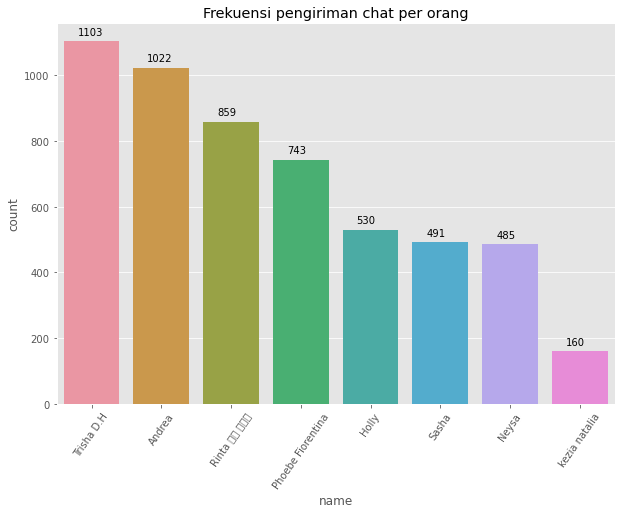

In [65]:
plt.figure(figsize=(10,7))
chart = sns.countplot(df['name'], order=sorted_name)

for p, label in zip(chart.patches, df["name"].value_counts().values):
    chart.annotate(label, (p.get_x()+0.2, p.get_height()+ 20))
chart.set_xticklabels(chart.get_xticklabels(), rotation=55)

chart.set_title("Frekuensi pengiriman chat per orang")

plt.show()

https://github.com/nasalsabila/kamus-alay
https://towardsdatascience.com/text-classification-using-naive-bayes-theory-a-working-example-2ef4b7eb7d5a